In [1]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import LabelEncoder
# import seaborn as sns
# from sklearn.preprocessing import StandardScaler


In [2]:
# train_df = pd.read_csv("data/dynamic_labeled_train.csv")
# val_df = pd.read_csv("data/dynamic_labeled_dev.csv")
# test_df = pd.read_csv("data/dynamic_labeled_test.csv")


# Preprocessing And Visualization

In [ ]:
# print(train_df.describe())
# print(train_df.info())
# print(train_df.columns)

## Data Cleaning & Preprocessing

### 1. Convert Datetime

In [4]:
# def convert_datetime(df):
#     # Chuy·ªÉn ƒë·ªïi c·ªôt 'Date' sang ki·ªÉu datetime
#     df['Date'] = pd.to_datetime(df['Date'])
#     # S·∫Øp x·∫øp l·∫°i d·ªØ li·ªáu theo th·ªùi gian ƒë·ªÉ ƒë·∫£m b·∫£o t√≠nh tu·∫ßn t·ª±
#     df = df.sort_values(by='Date').reset_index(drop=True)
#     # ƒê·∫∑t 'Date' l√†m ch·ªâ m·ª•c (index) c·ªßa DataFrame ƒë·ªÉ thu·∫≠n ti·ªán cho vi·ªác slicing v√† plotting
#     df.set_index('Date', inplace=True)

### 2. Encode target label

In [5]:
# def encode_label(df):
#     # Ki·ªÉm tra c√°c gi√° tr·ªã duy nh·∫•t trong c·ªôt 'Label'
#     print(df['Label'].value_counts())
#     # G√°n nh√£n theo quy ∆∞·ªõc: hold:0, buy:1, sell:2
#     label_map = {'HOLD': 0, 'BUY': 1, 'SELL': 2}
#     df['Label_encoded'] = df['Label'].map(label_map)
#     return df

### 3. Check duplicate data

In [6]:
# def check_duplicate(df):
#     duplicate_rows = df.duplicated().sum()
#     print(f"S·ªë l∆∞·ª£ng d√≤ng d·ªØ li·ªáu tr√πng l·∫∑p: {duplicate_rows}")

#     # N·∫øu c√≥, x√≥a ch√∫ng ƒëi
#     if duplicate_rows > 0:
#         train_df.drop_duplicates(inplace=True)

### 4. Data Cleaning Pipeline

In [7]:
# def data_cleaning_pipeline(df):
#     convert_datetime(df)
#     encode_label(df)
#     check_duplicate(df)
#     return df

## Exploratory Data Analysis

### 1. Visualize Trend Over Time

In [8]:
# def visualize_trend_over_time(df):
#     plt.figure(figsize=(15, 7))
#     # Kh√¥ng thay ƒë·ªïi c·ªôt 'Date', ch·ªâ d√πng b·∫£n t·∫°m th·ªùi cho vi·ªác v·∫Ω n·∫øu c·∫ßn
#     date_col = df['Date']
#     if not pd.api.types.is_datetime64_any_dtype(date_col):
#         date_col = pd.to_datetime(date_col)
#     plt.plot(date_col, df['Close'], label='Gi√° ƒë√≥ng c·ª≠a (Close Price)')
#     plt.title('Xu h∆∞·ªõng gi√° ƒë√≥ng c·ª≠a theo th·ªùi gian')
#     plt.xlabel('Ng√†y')
#     plt.ylabel('Gi√°')
#     plt.legend()
#     plt.grid(True)
#     plt.gcf().autofmt_xdate()  # T·ª± ƒë·ªông format tr·ª•c x cho ƒë·∫πp
#     plt.show()

### 2. Analyze Volume

In [9]:
# def analyze_volume(df):
#     monthly_volume = df.resample('M', on='Date')['Volume'].sum()
#     plt.figure(figsize=(15, 7))
#     plt.bar(monthly_volume.index, monthly_volume.values, width=20, color='gray')
#     plt.title('Kh·ªëi l∆∞·ª£ng giao d·ªãch theo th√°ng')
#     plt.xlabel('Th√°ng')
#     plt.ylabel('Kh·ªëi l∆∞·ª£ng')
#     plt.gcf().autofmt_xdate()
#     plt.show()

### 3. Analyze Label Distribution

In [10]:
# def analyze_label_distribution(df):
#     plt.figure(figsize=(8, 6))
#     sns.countplot(x='Label', data=df)
#     plt.title('Ph√¢n b·ªï c√°c nh√£n')
#     plt.show()

### 4. Corelation Matrix


In [11]:
# def analyze_correlation_matrix(df):
#     # Ch·ªâ ch·ªçn c√°c c·ªôt s·ªë ƒë·ªÉ t√≠nh t∆∞∆°ng quan
#     numeric_cols = df.select_dtypes(include=['float64', 'int64'])
#     correlation_matrix = numeric_cols.corr()

#     plt.figure(figsize=(10, 8))
#     sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
#     plt.title('Ma tr·∫≠n t∆∞∆°ng quan gi·ªØa c√°c ƒë·∫∑c tr∆∞ng')
#     plt.show()

### 5. EDA Pipeline

In [12]:
# def eda_pipeline(df):
#     visualize_trend_over_time(df)
#     analyze_volume(df)
#     analyze_label_distribution(df)
#     analyze_correlation_matrix(df)
#     return df

## Feature Engineering

In [13]:
# from ta import add_all_ta_features

# def add_technical_indicators(df):
#     """
#     H√†m ƒë·ªÉ th√™m t·∫•t c·∫£ c√°c ch·ªâ b√°o k·ªπ thu·∫≠t t·ª´ th∆∞ vi·ªán 'ta' v√†o DataFrame.
#     DataFrame ƒë·∫ßu v√†o ph·∫£i c√≥ c√°c c·ªôt: 'Open', 'High', 'Low', 'Close', 'Volume'.
#     """
#     # ƒê·∫£m b·∫£o c√°c c·ªôt OHLCV c√≥ ki·ªÉu d·ªØ li·ªáu s·ªë
#     for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
#         if col in df.columns:
#             df[col] = pd.to_numeric(df[col], errors='coerce')
#         else:
#             raise ValueError(f"C·ªôt '{col}' kh√¥ng t·ªìn t·∫°i trong DataFrame.")

#     print(f"Th√™m c√°c ch·ªâ b√°o TA v√†o DataFrame c√≥ shape: {df.shape}")

#     # L∆∞u l·∫°i t√™n c·ªôt g·ªëc ƒë·ªÉ kh√¥i ph·ª•c sau.
#     original_columns = df.columns.tolist()
#     df.columns = [col.lower() for col in df.columns]

#     # Th√™m t·∫•t c·∫£ c√°c ch·ªâ b√°o.
#     # `fillna=True` s·∫Ω t·ª± ƒë·ªông ƒëi·ªÅn c√°c gi√° tr·ªã NaN b·∫±ng ffill.
#     df_with_ta = add_all_ta_features(
#         df, open="open", high="high", low="low", close="close", volume="volume", fillna=True
#     )

#     # Kh√¥ng c·∫ßn ƒë·ªïi v·ªÅ ch·ªØ hoa n·ªØa, gi·ªØ nguy√™n t√™n c·ªôt nh∆∞ sau khi th√™m ch·ªâ b√°o
#     # N·∫øu mu·ªën kh√¥i ph·ª•c t√™n c·ªôt g·ªëc cho c√°c c·ªôt ban ƒë·∫ßu, c√≥ th·ªÉ l√†m nh∆∞ sau:
#     for col in original_columns:
#         col_lower = col.lower()
#         if col_lower not in df_with_ta.columns and col_lower in df.columns:
#             df_with_ta[col_lower] = df[col_lower]

#     # X·ª≠ l√Ω c√°c gi√° tr·ªã v√¥ c·ª±c (inf) c√≥ th·ªÉ xu·∫•t hi·ªán do chia cho 0
#     df_with_ta.replace([np.inf, -np.inf], np.nan, inplace=True)
#     # ƒêi·ªÅn n·ªët c√°c gi√° tr·ªã NaN c√≤n s√≥t l·∫°i
#     df_with_ta.fillna(method='bfill', inplace=True)
#     df_with_ta.fillna(method='ffill', inplace=True)

#     print(f"Shape m·ªõi sau khi th√™m ch·ªâ b√°o TA: {df_with_ta.shape}")
#     return df_with_ta

## Preprocessing Pipeline

In [14]:
# def preprocessing_pipeline(df):
#     data_cleaning_pipeline(df)
#     eda_pipeline(df)
#     add_technical_indicators(df)
#     return df

In [ ]:
# train_df = preprocessing_pipeline(train_df)

In [ ]:
# val_df = preprocessing_pipeline(val_df)

In [ ]:
# test_df = preprocessing_pipeline(test_df)

# Start Here

In [22]:
import pandas as pd

train_df = pd.read_csv("data/full_train_data.csv")
val_df = pd.read_csv("data/full_val_data.csv")
test_df = pd.read_csv("data/full_test_data.csv")

# Backtest

In [25]:
import numpy as np

## 1. Fixed Allocation Backtest

In [33]:
def run_event_driven_backtest(price_series, signals):
    """
    Ch·∫°y backtest vector h√≥a d·ª±a tr√™n chu·ªói gi√° v√† t√≠n hi·ªáu.
    Tr√°nh ƒë∆∞·ª£c lookahead bias b·∫±ng c√°ch s·ª≠ d·ª•ng .shift(1) cho v·ªã th·∫ø.
    """
    backtest_df = pd.DataFrame({'price': price_series, 'signal': signals})
    backtest_df['asset_log_returns'] = np.log(backtest_df['price'] / backtest_df['price'].shift(1))
    
    # S·ª≠ d·ª•ng ffill() thay cho replace(..., method='ffill') ƒë·ªÉ tr√°nh FutureWarning
    backtest_df['position'] = backtest_df['signal'].replace(0, np.nan).ffill().shift(1)
    backtest_df['strategy_log_returns'] = backtest_df['asset_log_returns'] * backtest_df['position']
    
    # T·∫°o ƒë∆∞·ªùng cong v·ªën (equity curve)
    backtest_df['cumulative_asset_returns'] = backtest_df['asset_log_returns'].cumsum().apply(np.exp)
    backtest_df['cumulative_strategy_returns'] = backtest_df['strategy_log_returns'].cumsum().apply(np.exp)
    
    return backtest_df.dropna()

## 2. Event - Driven Backtest


In [27]:
def run_event_driven_backtest(price_series, signals, barriers_df):
    """H√†m backtest d·ª±a tr√™n s·ª± ki·ªán (gi·ªØ nguy√™n)."""
    returns_list = []
    in_position = False
    position_type = 0
    entry_price = 0
    current_pt, current_sl, current_vb = np.inf, 0, pd.Timestamp.max
    trades = []
    
    for timestamp, price in price_series.items():
        daily_return = 0
        if in_position:
            exit_reason = None
            if position_type == 1 and price <= current_sl:
                exit_reason = "Stop-Loss"
            elif position_type == 1 and price >= current_pt:
                exit_reason = "Profit-Take"
            elif pd.notna(current_vb) and timestamp >= current_vb:
                exit_reason = "Time-Out"
            
            if exit_reason:
                trade_return = (price / entry_price - 1) * position_type
                trades.append(trade_return)
                daily_return = trade_return
                in_position = False
            else:
                prev_price = price_series.loc[:timestamp].iloc[-2]
                daily_return = (price / prev_price - 1) * position_type
            returns_list.append(daily_return)
        else:
            signal = signals.loc[timestamp] if timestamp in signals.index else 0
            if signal in [1, -1]:
                in_position = True
                position_type = signal
                entry_price = price
                current_pt = barriers_df.loc[timestamp, 'pt_level']
                current_sl = barriers_df.loc[timestamp, 'sl_level']
                current_vb = barriers_df.loc[timestamp, 'vb_timestamp']
            returns_list.append(0)
            
    trade_metrics = {}
    if trades:
        trade_returns = pd.Series(trades)
        win_rate = (trade_returns > 0).sum() / len(trade_returns) if len(trade_returns) > 0 else 0
        profit_factor = trade_returns[trade_returns > 0].sum() / abs(trade_returns[trade_returns < 0].sum()) if abs(trade_returns[trade_returns < 0].sum()) > 0 else np.inf
        trade_metrics = {"Number of Trades": len(trades), "Win Rate": f"{win_rate:.2%}", "Profit Factor": f"{profit_factor:.2f}"}
        
    return pd.Series(returns_list, index=price_series.index), trade_metrics

# Triple Barrier Labeling

In [20]:
import numba  # Th∆∞ vi·ªán ƒë·ªÉ tƒÉng t·ªëc ƒë·ªô cho code Python

@numba.njit
def _calculate_atr_numba(high, low, close, n=14):
    """
    H√†m n·ªôi b·ªô ƒë·ªÉ t√≠nh ATR b·∫±ng Wilder's smoothing.
    """
    tr = np.zeros_like(high)
    for i in range(1, len(high)):
        tr[i] = np.max(np.array([
            high[i] - low[i],
            np.abs(high[i] - close[i-1]),
            np.abs(low[i] - close[i-1])
        ]))
    
    atr = np.zeros_like(high)
    atr[n-1] = np.mean(tr[0:n])  # First ATR is a simple average
    for i in range(n, len(high)):
        atr[i] = (atr[i-1] * (n-1) + tr[i]) / n
        
    return atr

@numba.njit
def _find_barrier_hits_numba(prices, pt_levels, sl_levels, time_limit):
    """
    H√†m numba ƒë·ªÉ l·∫∑p qua c√°c r√†o c·∫£n v√† tr·∫£ v·ªÅ nh√£n c√πng th·ªùi ƒëi·ªÉm ch·∫°m.
    
    Returns:
        tuple(np.array, np.array): (labels, hit_indices)
    """
    n = len(prices)
    labels = np.zeros(n, dtype=np.int8)       # 0: Time-out, 1: Profit-Take, -1: Stop-Loss
    hit_indices = np.full(n, -1, dtype=np.int64) # L∆∞u v·ªã tr√≠ index khi ch·∫°m r√†o c·∫£n

    for i in range(n):
        # B·ªè qua n·∫øu c√°c m·ª©c r√†o c·∫£n kh√¥ng h·ª£p l·ªá
        if np.isnan(pt_levels[i]) or np.isnan(sl_levels[i]):
            continue
            
        # V√≤ng l·∫∑p t√¨m ki·∫øm trong t∆∞∆°ng lai
        for j in range(1, time_limit + 1):
            if i + j >= n:
                break  # ƒê√£ ƒëi h·∫øt m·∫£ng gi√°
            
            future_price = prices[i + j]
            
            # Ki·ªÉm tra ch·∫°m r√†o c·∫£n tr√™n (Profit-Take)
            if future_price >= pt_levels[i]:
                labels[i] = 1
                hit_indices[i] = i + j
                break  # Tho√°t v√≤ng l·∫∑p khi ƒë√£ t√¨m th·∫•y ƒëi·ªÉm ch·∫°m
            
            # Ki·ªÉm tra ch·∫°m r√†o c·∫£n d∆∞·ªõi (Stop-Loss)
            elif future_price <= sl_levels[i]:
                labels[i] = -1
                hit_indices[i] = i + j
                break  # Tho√°t v√≤ng l·∫∑p khi ƒë√£ t√¨m th·∫•y ƒëi·ªÉm ch·∫°m
        
        # N·∫øu kh√¥ng ch·∫°m r√†o c·∫£n n√†o, g√°n s·ª± ki·ªán h·∫øt h·∫°n (time-out)
        if labels[i] == 0:
            # L·∫•y v·ªã tr√≠ cu·ªëi c√πng trong c·ª≠a s·ªï th·ªùi gian
            end_idx = min(i + time_limit, n - 1)
            hit_indices[i] = end_idx

    return labels, hit_indices


def apply_atr_triple_barrier_df(df, profit_take_factor=2.0, stop_loss_factor=1.5, time_limit=12, atr_period=14):
    """
    √Åp d·ª•ng Triple Barrier tr√™n DataFrame, tr·∫£ v·ªÅ DataFrame m·ªõi v·ªõi c√°c c·ªôt:
    - pt_level: m·ª©c gi√° ch·ªët l·ªùi (upper barrier)
    - sl_level: m·ª©c gi√° c·∫Øt l·ªó (lower barrier)
    - vb_timestamp: timestamp th·ªùi ƒëi·ªÉm ch·∫°m barrier ho·∫∑c h·∫øt time_limit
    - label: nh√£n k·∫øt qu·∫£ (-1, 0, 1)
    """
    # 1. Chu·∫©n b·ªã d·ªØ li·ªáu d·∫°ng numpy array
    high = df['high'].values
    low = df['low'].values
    close = df['close'].values

    # 2. T√≠nh to√°n ATR v√† c√°c m·ª©c r√†o c·∫£n
    atr_values = _calculate_atr_numba(high, low, close, n=atr_period)
    pt_level = close + (profit_take_factor * atr_values)
    sl_level = close - (stop_loss_factor * atr_values)

    # 3. G·ªçi h√†m numba ƒë·ªÉ t√¨m ki·∫øm v√† g√°n nh√£n
    labels, hit_indices = _find_barrier_hits_numba(close, pt_level, sl_level, time_limit)

    # 4. T·∫°o DataFrame k·∫øt qu·∫£ v√† g√°n c√°c c·ªôt
    result_df = df.copy()
    result_df['pt_level'] = pt_level
    result_df['sl_level'] = sl_level
    result_df['label'] = labels

    # G√°n vb_timestamp m·ªôt c√°ch ch√≠nh x√°c
    # S·ª≠ d·ª•ng object dtype cho m·∫£ng timestamp ƒë·ªÉ tr√°nh l·ªói v·ªõi pd.NaT
    default_timestamps = np.full(len(df.index), pd.NaT, dtype=object)
    # L·∫•y ra c√°c index h·ª£p l·ªá
    valid_indices_mask = hit_indices != -1
    valid_hit_indices = hit_indices[valid_indices_mask]
    # G√°n timestamp d·ª±a tr√™n v·ªã tr√≠ index
    # ƒê·∫£m b·∫£o df.index l√† ki·ªÉu DatetimeIndex ho·∫∑c c√≥ th·ªÉ l·∫•y gi√° tr·ªã timestamp
    if isinstance(df.index, (pd.DatetimeIndex, pd.Index)):
        index_values = df.index.values
    else:
        index_values = np.array(df.index)
    default_timestamps[valid_indices_mask] = index_values[valid_hit_indices]
    result_df['vb_timestamp'] = default_timestamps

    return result_df

PROFIT_TAKE_FACTOR = 2.5
STOP_LOSS_FACTOR = 1.5
TIME_LIMIT = 12
ATR_PERIOD = 24

TBA_ARGS = {
    'profit_take_factor': PROFIT_TAKE_FACTOR,
    'stop_loss_factor': STOP_LOSS_FACTOR,
    'time_limit': TIME_LIMIT,
    'atr_period': ATR_PERIOD
}

train_df = apply_atr_triple_barrier_df(train_df, **TBA_ARGS)
val_df = apply_atr_triple_barrier_df(val_df, **TBA_ARGS)
test_df = apply_atr_triple_barrier_df(test_df, **TBA_ARGS)

Profit Take Factor: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [01:58<00:00,  5.91s/it]


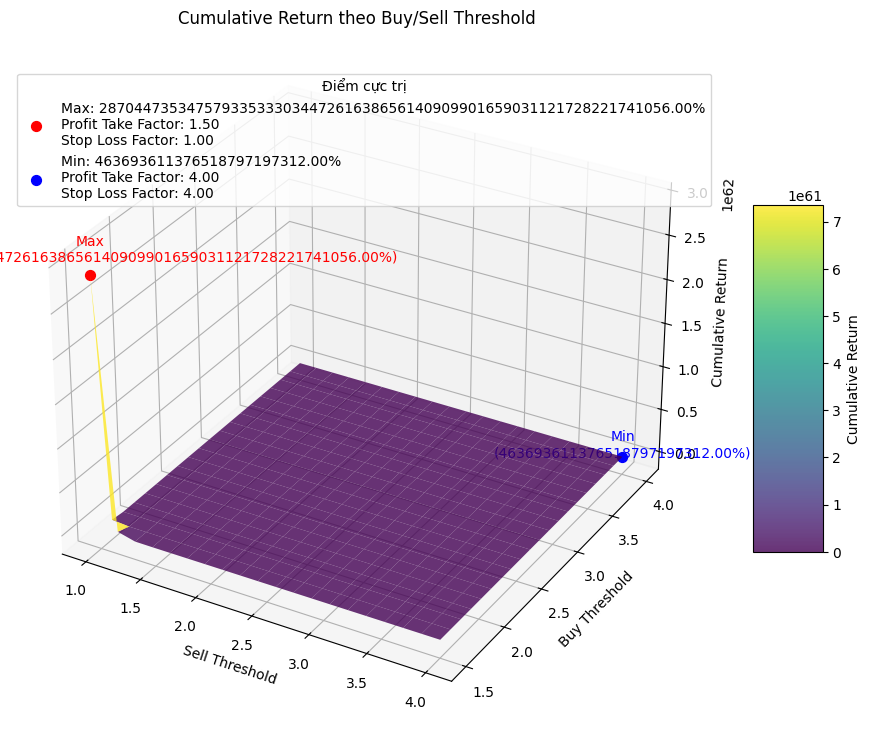

In [34]:
import matplotlib.pyplot as plt

def maximize_cum_return_in_sl_pt_threshold_grid(results_df):
    profit_take_factors = np.linspace(1.5, 4, 20)
    stop_loss_factors = np.linspace(1.0, 4, 20)
    Z = np.zeros((len(profit_take_factors), len(stop_loss_factors)))

    from tqdm import tqdm

    # V√≤ng l·∫∑p t√≠nh to√°n v·ªõi tqdm progress bar
    for i, profit_take_factor in enumerate(tqdm(profit_take_factors, desc="Profit Take Factor")):
        for j, stop_loss_factor in enumerate(tqdm(stop_loss_factors, desc="Stop Loss Factor", leave=False)):
            TBA_ARGS = {
                'profit_take_factor': profit_take_factor,
                'stop_loss_factor': stop_loss_factor,
                'time_limit': TIME_LIMIT,
                'atr_period': ATR_PERIOD
            }
            df = apply_atr_triple_barrier_df(train_df, **TBA_ARGS)

            signals = df['label']

            results_df['signal'] = signals
            backtest_results = run_event_driven_backtest(results_df['close'], results_df['signal'])
            strategy_returns_series = np.exp(backtest_results['strategy_log_returns']) - 1
            equity_curve = (1 + strategy_returns_series).cumprod()
            total_return = equity_curve.iloc[-1] - 1
            Z[i, j] = float(total_return) / 100
            

    # T√¨m c·ª±c ƒë·∫°i & c·ª±c ti·ªÉu
    max_idx = np.unravel_index(np.argmax(Z), Z.shape)
    min_idx = np.unravel_index(np.argmin(Z), Z.shape)
    max_val = Z[max_idx]
    min_val = Z[min_idx]

    max_profit_take_factor = profit_take_factors[max_idx[0]]
    max_stop_loss_factor = stop_loss_factors[max_idx[1]]
    min_profit_take_factor = profit_take_factors[min_idx[0]]
    min_stop_loss_factor = stop_loss_factors[min_idx[1]]

    X, Y = np.meshgrid(stop_loss_factors, profit_take_factors)

    # --- V·∫Ω 3D surface v·ªõi ch√∫ th√≠ch t·ªça ƒë·ªô ---
    fig = plt.figure(figsize=(13, 9))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8) # Gi·∫£m alpha ƒë·ªÉ d·ªÖ nh√¨n text h∆°n

    # --- ƒê√ÅNH D·∫§U C·ª∞C ƒê·∫†I V√Ä IN T·ªåA ƒê·ªò ---
    # Ch√∫ th√≠ch ƒë∆∞·ª£c c·∫≠p nh·∫≠t ƒë·ªÉ bao g·ªìm t·ªça ƒë·ªô (buy, sell)
    max_label = (f'Max: {max_val:.2%}\n'
                 f'Profit Take Factor: {max_profit_take_factor:.2f}\n'
                 f'Stop Loss Factor: {max_stop_loss_factor:.2f}')
    ax.scatter(max_stop_loss_factor, max_profit_take_factor, max_val, color='red', s=50, label=max_label)
    ax.text(max_stop_loss_factor, max_profit_take_factor, max_val * 1.05, f'Max\n({max_val:.2%})', color='red', fontsize=10, ha='center')

    # --- ƒê√ÅNH D·∫§U C·ª∞C TI·ªÇU V√Ä IN T·ªåA ƒê·ªò ---
    # Ch√∫ th√≠ch ƒë∆∞·ª£c c·∫≠p nh·∫≠t ƒë·ªÉ bao g·ªìm t·ªça ƒë·ªô (buy, sell)
    min_label = (f'Min: {min_val:.2%}\n'
                 f'Profit Take Factor: {min_profit_take_factor:.2f}\n'
                 f'Stop Loss Factor: {min_stop_loss_factor:.2f}')
    ax.scatter(min_stop_loss_factor, min_profit_take_factor, min_val, color='blue', s=50, label=min_label)
    ax.text(min_stop_loss_factor, min_profit_take_factor, min_val * 0.95, f'Min\n({min_val:.2%})', color='blue', fontsize=10, ha='center')

    ax.set_xlabel('Sell Threshold')
    ax.set_ylabel('Buy Threshold')
    ax.set_zlabel('Cumulative Return')
    ax.set_title('Cumulative Return theo Buy/Sell Threshold')
    
    # Hi·ªÉn th·ªã ch√∫ th√≠ch (legend) v·ªõi th√¥ng tin t·ªça ƒë·ªô
    ax.legend(title="ƒêi·ªÉm c·ª±c tr·ªã", loc='upper left', bbox_to_anchor=(0.0, 0.95))
    
    fig.colorbar(surf, shrink=0.5, aspect=5, label='Cumulative Return')
    plt.show()

maximize_cum_return_in_sl_pt_threshold_grid(train_df)

In [ ]:
import pywt

def apply_wavelet_transform(data, columns, wavelet='db4', level=1):
    """
    √Åp d·ª•ng Discrete Wavelet Transform (DWT) l√™n c√°c c·ªôt ƒë∆∞·ª£c ch·ªâ ƒë·ªãnh.
    T√°ch m·ªói c·ªôt th√†nh th√†nh ph·∫ßn Approximation (xu h∆∞·ªõng) v√† Detail (nhi·ªÖu).
    """
    new_df = data.copy()
    print(f"\n√Åp d·ª•ng Wavelet Transform (wavelet: {wavelet}) cho c√°c c·ªôt: {columns}")
    
    for col in columns:
        # L·∫•y d·ªØ li·ªáu c·ªßa c·ªôt
        signal = new_df[col].values
        
        # Th·ª±c hi·ªán DWT
        coeffs = pywt.dwt(signal, wavelet, mode='symmetric')
        cA, cD = coeffs  # cA: Approximation (low-frequency), cD: Detail (high-frequency)
        
        # Do DWT l√†m gi·∫£m m·ªôt n·ª≠a ƒë·ªô d√†i, ta c·∫ßn pad ƒë·ªÉ gh√©p l·∫°i v√†o DataFrame
        # M·ªôt c√°ch ƒë∆°n gi·∫£n l√† l·∫∑p l·∫°i gi√° tr·ªã cu·ªëi c√πng
        cA_padded = np.pad(cA, (0, len(signal) - len(cA)), 'edge')
        cD_padded = np.pad(cD, (0, len(signal) - len(cD)), 'edge')
        
        # Th√™m c√°c feature m·ªõi v√†o DataFrame
        new_df[f'{col}_cA'] = cA_padded
        new_df[f'{col}_cD'] = cD_padded
        
    # B·∫°n c√≥ th·ªÉ ch·ªçn gi·ªØ l·∫°i ho·∫∑c lo·∫°i b·ªè c√°c c·ªôt g·ªëc
    # new_df = new_df.drop(columns=columns)
    
    return new_df

features_to_transform = [
    'momentum_pvo_hist', 
    'volatility_atr', 
    'volatility_dcw', 
    'momentum_pvo',
    'volume_vpt'
]

# T·∫°o DataFrame m·ªõi v·ªõi c√°c feature ƒë√£ bi·∫øn ƒë·ªïi
train_df = apply_wavelet_transform(train_df, features_to_transform)
val_df = apply_wavelet_transform(val_df, features_to_transform)
test_df = apply_wavelet_transform(test_df, features_to_transform)

print("\nHo√†n t·∫•t Wavelet Transform. C√°c feature m·ªõi ƒë√£ ƒë∆∞·ª£c th√™m v√†o.")
print("C√°c c·ªôt m·ªõi:", [col for col in train_df.columns if '_cA' in col or '_cD' in col])


√Åp d·ª•ng Wavelet Transform (wavelet: db4) cho c√°c c·ªôt: ['momentum_pvo_hist', 'volatility_atr', 'volatility_dcw', 'momentum_pvo', 'volume_vpt']

√Åp d·ª•ng Wavelet Transform (wavelet: db4) cho c√°c c·ªôt: ['momentum_pvo_hist', 'volatility_atr', 'volatility_dcw', 'momentum_pvo', 'volume_vpt']

√Åp d·ª•ng Wavelet Transform (wavelet: db4) cho c√°c c·ªôt: ['momentum_pvo_hist', 'volatility_atr', 'volatility_dcw', 'momentum_pvo', 'volume_vpt']

Ho√†n t·∫•t Wavelet Transform. C√°c feature m·ªõi ƒë√£ ƒë∆∞·ª£c th√™m v√†o.
C√°c c·ªôt m·ªõi v√≠ d·ª•: ['momentum_pvo_hist_cA', 'momentum_pvo_hist_cD', 'volatility_atr_cA', 'volatility_atr_cD']


# LightBGM

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import optuna
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import warnings

# T·∫Øt c√°c c·∫£nh b√°o kh√¥ng c·∫ßn thi·∫øt
warnings.filterwarnings('ignore')

# ------------------------------------------------------------------------------
# B∆Ø·ªöC 1: Chu·∫©n b·ªã d·ªØ li·ªáu
# ------------------------------------------------------------------------------
# X√°c ƒë·ªãnh c√°c c·ªôt features
features = [col for col in train_df.columns if col not in ['label', 'date', 'label_encoded', 'triple barrier label']]
X_train = train_df[features]
y_train = train_df['triple barrier label']
X_val = val_df[features]
y_val = val_df['triple barrier label']
X_test = test_df[features]
y_test = test_df['triple barrier label']

print(f"\nK√≠ch th∆∞·ªõc t·∫≠p Train:      {X_train.shape}")
print(f"K√≠ch th∆∞·ªõc t·∫≠p Validation: {X_val.shape}")
print(f"K√≠ch th∆∞·ªõc t·∫≠p Test:        {X_test.shape}")

# ------------------------------------------------------------------------------
# B∆Ø·ªöC 2: T·∫†O LIGHTGBM DATASET v√† H√ÄM ƒê√ÅNH GI√Å
# ------------------------------------------------------------------------------
print("\nChuy·ªÉn ƒë·ªïi Pandas DataFrame sang LightGBM Dataset...")

def f1_eval(y_pred, dataset):
    """
    Custom Macro F1-Score evaluation function for LightGBM.
    LightGBM passes (y_pred, dataset) to feval, not (y_true, y_pred).
    """
    y_true = dataset.get_label()
    n_classes = len(np.unique(y_true))
    y_pred_labels = y_pred.reshape(-1, n_classes).argmax(axis=1)
    f1 = f1_score(y_true, y_pred_labels, average='macro')
    return 'macro_f1', f1, True  # (metric_name, value, is_higher_better)

# T·∫°o tr·ªçng s·ªë m·∫´u
sample_weights = {0: 1.0, 1: 3.0, 2: 1.5}
sample_weight_array = np.array([sample_weights[label] for label in y_train])

# T·∫°o lgb.Dataset
train_data = lgb.Dataset(X_train, label=y_train, weight=sample_weight_array)
# T·∫≠p validation kh√¥ng c·∫ßn weight, v√¨ ch√∫ng ta mu·ªën ƒë√°nh gi√° tr√™n ph√¢n ph·ªëi th·ª±c
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data) 
print("T·∫°o Dataset ho√†n t·∫•t.")

# ------------------------------------------------------------------------------
# B∆Ø·ªöC 3: T·ªêI ∆ØU H√ìA SI√äU THAM S·ªê TR√äN F1-SCORE
# ------------------------------------------------------------------------------
print("\nB·∫Øt ƒë·∫ßu t·ªëi ∆∞u si√™u tham s·ªë tr√™n F1-Score...")


K√≠ch th∆∞·ªõc t·∫≠p Train:      (755691, 101)
K√≠ch th∆∞·ªõc t·∫≠p Validation: (70216, 101)
K√≠ch th∆∞·ªõc t·∫≠p Test:        (214996, 101)

Chuy·ªÉn ƒë·ªïi Pandas DataFrame sang LightGBM Dataset...
T·∫°o Dataset ho√†n t·∫•t.

B·∫Øt ƒë·∫ßu t·ªëi ∆∞u si√™u tham s·ªë tr√™n F1-Score...


In [ ]:
def objective_f1(trial):
    param = {
        'objective': 'multiclass',
        'num_class': 3,
        'metric': 'None',  # <-- THAY ƒê·ªîI QUAN TR·ªåNG: T·∫Øt metric m·∫∑c ƒë·ªãnh
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'random_state': 42,
        'n_jobs': -1,
        # C√°c tham s·ªë ƒë·ªÉ Optuna t√¨m ki·∫øm (gi·ªØ nguy√™n)
        'n_estimators': trial.suggest_int('n_estimators', 200, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'feature_pre_filter': False,
    }
    
    # Pruning b√¢y gi·ªù s·∫Ω theo d√µi 'macro_f1'
    pruning_callback = optuna.integration.LightGBMPruningCallback(trial, 'macro_f1')
    
    # Hu·∫•n luy·ªán model v·ªõi API L√µi
    model = lgb.train(
        param,
        train_data,
        valid_sets=[val_data],
        feval=f1_eval,  # <-- THAY ƒê·ªîI QUAN TR·ªåNG: D√πng `feval` ƒë·ªÉ truy·ªÅn h√†m t√πy ch·ªânh
        callbacks=[lgb.early_stopping(100, verbose=False), pruning_callback]
    )
    
    # Tr·∫£ v·ªÅ F1-score ƒë·ªÉ Optuna t·ªëi ∆∞u h√≥a
    return model.best_score['valid_0']['macro_f1'] # <-- THAY ƒê·ªîI QUAN TR·ªåNG

# T·∫°o study ƒë·ªÉ T·ªêI ƒêA H√ìA F1-score
study = optuna.create_study(
    direction='maximize', 
    pruner=optuna.pruners.MedianPruner(n_warmup_steps=10)
)

# Ch·∫°y t·ªëi ∆∞u h√≥a
study.optimize(objective_f1, timeout=28800)

print("\nüî• T·ªëi ∆∞u F1-Score ho√†n t·∫•t!")
print("T·ªïng trial ƒë√£ th·ª±c hi·ªán:", len(study.trials))
print("Best params:", study.best_params)
print("Best Macro F1-Score:", study.best_value)



Hu·∫•n luy·ªán final model v·ªõi b·ªô tham s·ªë t·ªët nh·∫•t...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23603
[LightGBM] [Info] Number of data points in the train set: 755691, number of used features: 101
[LightGBM] [Info] Start training from score -1.603639
[LightGBM] [Info] Start training from score -0.820070
[LightGBM] [Info] Start training from score -1.026005
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

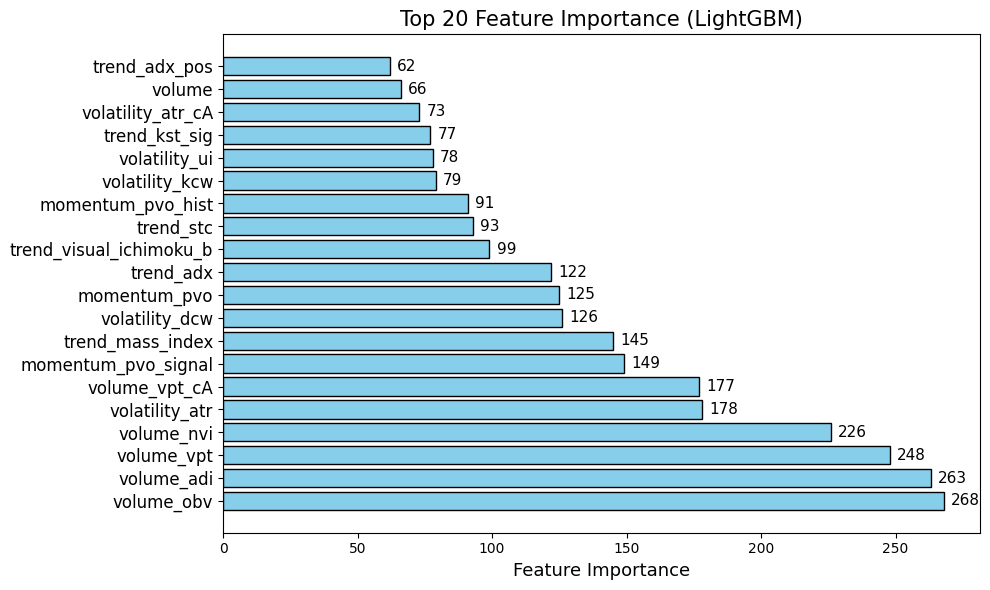

Top 20 feature ·∫£nh h∆∞·ªüng nh·∫•t:
1. volume_obv: 268
2. volume_adi: 263
3. volume_vpt: 248
4. volume_nvi: 226
5. volatility_atr: 178
6. volume_vpt_cA: 177
7. momentum_pvo_signal: 149
8. trend_mass_index: 145
9. volatility_dcw: 126
10. momentum_pvo: 125
11. trend_adx: 122
12. trend_visual_ichimoku_b: 99
13. trend_stc: 93
14. momentum_pvo_hist: 91
15. volatility_kcw: 79
16. volatility_ui: 78
17. trend_kst_sig: 77
18. volatility_atr_cA: 73
19. volume: 66
20. trend_adx_pos: 62


In [9]:
# ------------------------------------------------------------------------------
# B∆Ø·ªöC 4: Hu·∫•n luy·ªán final model v·ªõi best_params
# ------------------------------------------------------------------------------
print("\nHu·∫•n luy·ªán final model v·ªõi b·ªô tham s·ªë t·ªët nh·∫•t...")

# best_params = study.best_params
best_params = {'n_estimators': 909, 'learning_rate': 0.2570845293090703, 'num_leaves': 70, 'max_depth': 6, 'subsample': 0.9024076020857527, 'colsample_bytree': 0.9699804693180353, 'reg_alpha': 1.5859996341512163e-08, 'reg_lambda': 9.312851419938153e-08, 'min_child_samples': 92}

best_params.update({
    'objective': 'multiclass',
    'num_class': 3,
    'random_state': 42,
    'n_jobs': -1,
})

def f1_eval_sklearn(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    y_pred_labels = y_pred.reshape(-1, n_classes).argmax(axis=1)
    return 'macro_f1', f1_score(y_true, y_pred_labels, average='macro'), True

final_clf = lgb.LGBMClassifier(**best_params)

# Hu·∫•n luy·ªán v·ªõi API Scikit-Learn, truy·ªÅn sample_weight v√† h√†m eval v√†o .fit()
final_clf.fit(
    X_train, y_train,
    sample_weight=sample_weight_array,
    eval_set=[(X_val, y_val)],
    eval_metric=f1_eval_sklearn,
    callbacks=[lgb.early_stopping(100, verbose=True)]
)


importances = final_clf.feature_importances_
feature_names = X_train.columns if hasattr(X_train, "columns") else [f"f{i}" for i in range(X_train.shape[1])]

# L·∫•y top N feature quan tr·ªçng nh·∫•t
N = 20
indices = np.argsort(importances)[::-1][:N]
top_features = [feature_names[i] for i in indices]
top_importances = importances[indices]

plt.figure(figsize=(10, 6))
bars = plt.barh(range(N), top_importances[::-1], color='skyblue', edgecolor='k')
plt.yticks(range(N), [top_features[i] for i in range(N-1, -1, -1)], fontsize=12)
plt.xlabel("Feature Importance", fontsize=13)
plt.title(f"Top {N} Feature Importance (LightGBM)", fontsize=15)
plt.gca().invert_yaxis()
for i, v in enumerate(top_importances[::-1]):
    plt.text(v + max(top_importances)*0.01, i, f"{v}", va='center', fontsize=11)
plt.tight_layout()
plt.show()

print(f"Top {N} feature ·∫£nh h∆∞·ªüng nh·∫•t:")
for i in range(N):
    print(f"{i+1}. {top_features[i]}: {top_importances[i]}")

# Evaluations

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
def calculate_daily_performance_metrics(strategy_returns, risk_free_rate=0.0):
    """
    T√≠nh to√°n c√°c ch·ªâ s·ªë hi·ªáu su·∫•t d·ª±a tr√™n chu·ªói l·ª£i nhu·∫≠n H√ÄNG NG√ÄY.
    (Phi√™n b·∫£n ƒë√£ c·∫£i ti·∫øn)
    """
    periods_per_year = 252
    
    # T√≠nh l√£i su·∫•t phi r·ªßi ro h√†ng ng√†y
    daily_risk_free_rate = (1 + risk_free_rate)**(1/periods_per_year) - 1

    equity_curve = (1 + strategy_returns).cumprod()
    total_return = equity_curve.iloc[-1] - 1
    
    # T√≠nh l·ª£i nhu·∫≠n h√†ng nƒÉm (Annualized Return)
    num_years = len(strategy_returns) / periods_per_year
    annualized_return = (1 + total_return)**(1 / num_years) - 1 if num_years > 0 else 0

    mean_return = strategy_returns.mean()
    std_return = strategy_returns.std()
    
    # S·ª≠ d·ª•ng risk_free_rate trong Sharpe Ratio
    sharpe_ratio = (mean_return - daily_risk_free_rate) / std_return * np.sqrt(periods_per_year) if std_return != 0 else 0

    running_max = equity_curve.cummax()
    drawdown = (equity_curve - running_max) / running_max
    max_drawdown = drawdown.min()

    downside_std = strategy_returns[strategy_returns < 0].std()
    # S·ª≠ d·ª•ng risk_free_rate trong Sortino Ratio
    sortino_ratio = (mean_return - daily_risk_free_rate) / downside_std * np.sqrt(periods_per_year) if downside_std != 0 else 0

    # S·ª≠ d·ª•ng l·ª£i nhu·∫≠n h√†ng nƒÉm (annualized_return) cho Calmar Ratio
    calmar_ratio = annualized_return / abs(max_drawdown) if max_drawdown != 0 else 0
    
    metrics = {
        "Cumulative Return": f"{total_return:.2%}",
        "Annualized Return": f"{annualized_return:.2%}",
        "Annualized Sharpe Ratio": f"{sharpe_ratio:.2f}",
        "Max Drawdown": f"{max_drawdown:.2%}",
        "Sortino Ratio": f"{sortino_ratio:.2f}",
        "Calmar Ratio": f"{calmar_ratio:.2f}",
    }
    return metrics

def calculate_trade_based_metrics(backtest_df):
    """
    Ph√¢n t√≠ch hi·ªáu su·∫•t d·ª±a tr√™n t·ª´ng giao d·ªãch ho√†n ch·ªânh (v√†o l·ªánh -> tho√°t l·ªánh).
    (T√≠nh nƒÉng m·ªõi)
    """
    positions = backtest_df['position']
    # X√°c ƒë·ªãnh c√°c ƒëi·ªÉm thay ƒë·ªïi v·ªã th·∫ø ƒë·ªÉ nh√≥m c√°c giao d·ªãch
    trade_changes = positions.diff().ne(0)
    # G√°n m·ªôt ID duy nh·∫•t cho m·ªói giao d·ªãch
    trade_ids = trade_changes.cumsum()
    # Ch·ªâ x√©t nh·ªØng l√∫c c√≥ v·ªã th·∫ø (kh√°c 0)
    trades_df = backtest_df[positions != 0]

    if trades_df.empty:
        return {
            "Number of Trades": 0, "Win Rate": "N/A", "Profit Factor": "N/A",
            "Avg Win / Trade": "N/A", "Avg Loss / Trade": "N/A", "Payoff Ratio": "N/A"
        }

    # Gom nh√≥m theo t·ª´ng trade ID ƒë·ªÉ t√≠nh l·ª£i nhu·∫≠n cho m·ªói trade
    trade_log_returns = trades_df.groupby(trade_ids)['strategy_log_returns'].sum()
    trade_simple_returns = np.exp(trade_log_returns) - 1

    # T√≠nh c√°c ch·ªâ s·ªë
    num_trades = len(trade_simple_returns)
    winning_trades = trade_simple_returns[trade_simple_returns > 0]
    losing_trades = trade_simple_returns[trade_simple_returns < 0]

    num_win = len(winning_trades)
    num_loss = len(losing_trades)
    win_rate = num_win / num_trades if num_trades > 0 else 0

    gross_profit = winning_trades.sum()
    gross_loss = abs(losing_trades.sum())
    profit_factor = gross_profit / gross_loss if gross_loss != 0 else np.inf

    avg_win = winning_trades.mean() if num_win > 0 else 0
    avg_loss = losing_trades.mean() if num_loss > 0 else 0
    payoff_ratio = abs(avg_win / avg_loss) if avg_loss != 0 else np.inf

    metrics = {
        "Number of Trades": f"{num_trades}",
        "Win Rate": f"{win_rate:.2%}",
        "Profit Factor": f"{profit_factor:.2f}",
        "Avg Win / Trade": f"{avg_win:.2%}",
        "Avg Loss / Trade": f"{avg_loss:.2%}",
        "Payoff Ratio": f"{payoff_ratio:.2f}",
    }
    return metrics

# =============================================================================
# H√ÄM ƒê√ÅNH GI√Å T·ªîNG TH·ªÇ
# =============================================================================

def evaluate_trading_strategy(
    signals, 
    y_test, 
    test_df, 
    risk_free_rate=0.0,
    plot=True
):
    """
    ƒê√°nh gi√° chi·∫øn l∆∞·ª£c giao d·ªãch m·ªôt c√°ch to√†n di·ªán.
    (Phi√™n b·∫£n ƒë√£ c·∫£i ti·∫øn, t√≠ch h·ª£p ƒë·∫ßy ƒë·ªß c√°c b·ªô ch·ªâ s·ªë v√† bi·ªÉu ƒë·ªì)
    """
    results_df = test_df.copy()
    results_df['signal'] = signals
    results_df['true_label'] = y_test

    print("\nPh√¢n b·ªï t√≠n hi·ªáu d·ª± b√°o (-1 = SELL, 0 = HOLD, 1 = BUY):")
    print(pd.Series(signals).value_counts(normalize=True).apply("{:.2%}".format))

    # B∆Ø·ªöC 1: M√î PH·ªéNG GIAO D·ªäCH (VECTORIZED BACKTEST)
    print("\nƒêang ch·∫°y backtest...")
    backtest_results = run_event_driven_backtest(results_df['close'], results_df['signal'])
    print("Backtest ho√†n t·∫•t.")

    # B∆Ø·ªöC 2: T√çNH TO√ÅN C√ÅC B·ªò CH·ªà S·ªê HI·ªÜU SU·∫§T
    strategy_returns_series = np.exp(backtest_results['strategy_log_returns']) - 1
    daily_metrics = calculate_daily_performance_metrics(strategy_returns_series, risk_free_rate)
    trade_metrics = calculate_trade_based_metrics(backtest_results)

    print("\n--- HI·ªÜU SU·∫§T (D·ª∞A TR√äN L·ª¢I NHU·∫¨N H√ÄNG NG√ÄY) ---")
    for name, value in daily_metrics.items():
        print(f"{name:<25} {value}")
        
    print("\n--- HI·ªÜU SU·∫§T (D·ª∞A TR√äN T·ª™NG GIAO D·ªäCH) ---")
    for name, value in trade_metrics.items():
        print(f"{name:<25} {value}")

    # B∆Ø·ªöC 3: TR·ª∞C QUAN H√ìA K·∫æT QU·∫¢
    if plot:
        # 1. Bi·ªÉu ƒë·ªì Equity Curve
        plt.style.use('seaborn-v0_8-whitegrid')
        plt.figure(figsize=(14, 7))
        plt.plot(backtest_results['cumulative_strategy_returns'], label='Strategy Equity Curve')
        plt.plot(backtest_results['cumulative_asset_returns'], label='Buy & Hold Equity Curve', linestyle='--')
        plt.title('So s√°nh Hi·ªáu su·∫•t: Chi·∫øn l∆∞·ª£c vs. Mua v√† Gi·ªØ', fontsize=16)
        plt.xlabel('Th·ªùi gian')
        plt.ylabel('L·ª£i nhu·∫≠n T√≠ch l≈©y')
        plt.legend()
        plt.show()

        # 2. Bi·ªÉu ƒë·ªì Drawdown
        drawdown_series = (backtest_results['cumulative_strategy_returns'] / backtest_results['cumulative_strategy_returns'].cummax()) - 1
        plt.figure(figsize=(14, 7))
        plt.fill_between(drawdown_series.index, drawdown_series, 0, color='red', alpha=0.3)
        plt.title('Drawdown c·ªßa Chi·∫øn l∆∞·ª£c theo Th·ªùi gian', fontsize=16)
        plt.xlabel('Th·ªùi gian')
        plt.ylabel('Drawdown')
        plt.show()

    # B∆Ø·ªöC 4: PH√ÇN T√çCH HI·ªÜU SU·∫§T PH√ÇN LO·∫†I C·ª¶A M√î H√åNH
    y_test_mapped = y_test.replace({2: -1}) # √Ånh x·∫° l·∫°i nh√£n 2 th√†nh 1 ƒë·ªÉ kh·ªõp v·ªõi t√≠n hi·ªáu
    cm = confusion_matrix(y_test_mapped, signals, labels=[-1, 0, 1])
    target_names_mapped = ['SELL (-1)', 'HOLD (0)', 'BUY (1)']
    
    if plot:
        plt.figure(figsize=(7, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                    xticklabels=target_names_mapped, yticklabels=target_names_mapped)
        plt.title('Confusion Matrix (SELL/HOLD/BUY)', fontsize=16)
        plt.xlabel('Predicted Signal')
        plt.ylabel('Actual Label')
        plt.show()

    print("\n--- B√°o c√°o c√°c ch·ªâ s·ªë ph√¢n lo·∫°i (Precision, Recall, F1-score) ---")
    # S·ª≠ d·ª•ng labels ƒë·ªÉ ƒë·∫£m b·∫£o b√°o c√°o c√≥ ƒë·ªß 3 l·ªõp ngay c·∫£ khi 1 l·ªõp kh√¥ng xu·∫•t hi·ªán trong d·ª± b√°o
    print(classification_report(y_test_mapped, signals, target_names=target_names_mapped, digits=3, labels=[-1, 0, 1]))

    all_metrics = {**daily_metrics, **trade_metrics}
    return {
        "signals": signals,
        "results_df": results_df,
        "backtest_results": backtest_results,
        "performance_metrics": all_metrics,
        "confusion_matrix": cm,
        "classification_report": classification_report(y_test_mapped, signals, target_names=target_names_mapped, digits=3, output_dict=True, labels=[-1, 0, 1])
    }

def plot_cum_return_threshold_grid(probabilities, test_df):
    buy_thresholds = np.linspace(0.1, 0.9, 20)
    sell_thresholds = np.linspace(0.1, 0.9, 20)
    Z = np.zeros((len(buy_thresholds), len(sell_thresholds)))

    # V√≤ng l·∫∑p t√≠nh to√°n (gi·ªØ nguy√™n)
    for i, buy_th in enumerate(buy_thresholds):
        for j, sell_th in enumerate(sell_thresholds):
            signals = np.array([
                1 if p[1] > buy_th
                else -1 if p[2] > sell_th
                else 0
                for p in probabilities
            ])

        results_df = test_df.copy()
        results_df['signal'] = signals
        backtest_results = run_event_driven_backtest(results_df['close'], results_df['signal'])
        strategy_returns_series = np.exp(backtest_results['strategy_log_returns']) - 1
        metrics = calculate_daily_performance_metrics(strategy_returns_series)
        Z[i, j] = float(metrics["Cumulative Return"].strip('%')) / 100
            

    # T√¨m c·ª±c ƒë·∫°i & c·ª±c ti·ªÉu
    max_idx = np.unravel_index(np.argmax(Z), Z.shape)
    min_idx = np.unravel_index(np.argmin(Z), Z.shape)
    max_val = Z[max_idx]
    min_val = Z[min_idx]

    max_buy = buy_thresholds[max_idx[0]]
    max_sell = sell_thresholds[max_idx[1]]
    min_buy = buy_thresholds[min_idx[0]]
    min_sell = sell_thresholds[min_idx[1]]

    X, Y = np.meshgrid(sell_thresholds, buy_thresholds)

    # --- V·∫Ω 3D surface v·ªõi ch√∫ th√≠ch t·ªça ƒë·ªô ---
    fig = plt.figure(figsize=(13, 9))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8) # Gi·∫£m alpha ƒë·ªÉ d·ªÖ nh√¨n text h∆°n

    # --- ƒê√ÅNH D·∫§U C·ª∞C ƒê·∫†I V√Ä IN T·ªåA ƒê·ªò ---
    # Ch√∫ th√≠ch ƒë∆∞·ª£c c·∫≠p nh·∫≠t ƒë·ªÉ bao g·ªìm t·ªça ƒë·ªô (buy, sell)
    max_label = (f'Max: {max_val:.2%}\n'
                 f'Buy Th: {max_buy:.2f}\n'
                 f'Sell Th: {max_sell:.2f}')
    ax.scatter(max_sell, max_buy, max_val, color='red', s=50, label=max_label)
    ax.text(max_sell, max_buy, max_val * 1.05, f'Max\n({max_val:.2%})', color='red', fontsize=10, ha='center')

    # --- ƒê√ÅNH D·∫§U C·ª∞C TI·ªÇU V√Ä IN T·ªåA ƒê·ªò ---
    # Ch√∫ th√≠ch ƒë∆∞·ª£c c·∫≠p nh·∫≠t ƒë·ªÉ bao g·ªìm t·ªça ƒë·ªô (buy, sell)
    min_label = (f'Min: {min_val:.2%}\n'
                 f'Buy Th: {min_buy:.2f}\n'
                 f'Sell Th: {min_sell:.2f}')
    ax.scatter(min_sell, min_buy, min_val, color='blue', s=50, label=min_label)
    ax.text(min_sell, min_buy, min_val * 0.95, f'Min\n({min_val:.2%})', color='blue', fontsize=10, ha='center')

    ax.set_xlabel('Sell Threshold')
    ax.set_ylabel('Buy Threshold')
    ax.set_zlabel('Cumulative Return')
    ax.set_title('Cumulative Return theo Buy/Sell Threshold')
    
    # Hi·ªÉn th·ªã ch√∫ th√≠ch (legend) v·ªõi th√¥ng tin t·ªça ƒë·ªô
    ax.legend(title="ƒêi·ªÉm c·ª±c tr·ªã", loc='upper left', bbox_to_anchor=(0.0, 0.95))
    
    fig.colorbar(surf, shrink=0.5, aspect=5, label='Cumulative Return')
    plt.show()

In [ ]:
def run_full_evaluation(signals, X_test, y_test, test_df, tbm_params):
    """H√†m ƒë√°nh gi√° ƒë·∫ßy ƒë·ªß (gi·ªØ nguy√™n, ch·ªâ thay ƒë·ªïi c√°ch g·ªçi b√™n trong)."""
    print("--- B·∫Øt ƒë·∫ßu quy tr√¨nh ƒë√°nh gi√° tr√™n d·ªØ li·ªáu th·∫≠t ---")
    print("1. Nh·∫≠n t√≠n hi·ªáu t·ª´ m√¥ h√¨nh...")
    signals = pd.Series(signals, index=X_test.index)
    
    print("2. T·∫°o DataFrame R√†o c·∫£n cho backtest...")
    price_series = test_df['close']
    # G·ªçi h√†m M·ªöI ƒë·ªÉ t·∫°o r√†o c·∫£n
    
    print("3. Ch·∫°y backtest d·ª±a tr√™n s·ª± ki·ªán...")
    strategy_returns, trade_metrics = run_event_driven_backtest(price_series, signals, test_df)
    
    # ... (Ph·∫ßn b√°o c√°o v√† v·∫Ω bi·ªÉu ƒë·ªì gi·ªØ nguy√™n) ...
    print("\n--- K·∫æT QU·∫¢ HI·ªÜU SU·∫§T GIAO D·ªäCH ---")
    equity_curve = (1 + strategy_returns).cumprod()
    total_return = equity_curve.iloc[-1] - 1
    sharpe_ratio = (strategy_returns.mean() / strategy_returns.std()) * np.sqrt(252) if strategy_returns.std() != 0 else 0
    print(f"{'Cumulative Return':<25} {total_return:.2%}")
    print(f"{'Annualized Sharpe Ratio':<25} {sharpe_ratio:.2f}")
    for name, value in trade_metrics.items():
        print(f"{name:<25} {value}")
        
    print("\n--- K·∫æT QU·∫¢ PH√ÇN LO·∫†I C·ª¶A M√î H√åNH ---")
    print(classification_report(y_test, signals, labels=[0, 1, 2], target_names=['HOLD', 'BUY', 'SELL']))



In [ ]:
buy_thresholds = 0.1
sell_thresholds = 0.8

signals = np.array([
    1 if p[1] > buy_thresholds
    else -1 if p[2] > sell_thresholds
    else 0
    for p in probabilities
])

result = evaluate_trading_strategy(signals, y_test, test_df, plot=True)

In [126]:
# 4. G·ªåI H√ÄM ƒê√ÅNH GI√Å
# H√†m n√†y b√¢y gi·ªù s·∫Ω t·ª± ƒë·ªông t·∫°o ra c√°c r√†o c·∫£n c·∫ßn thi·∫øt cho backtest b√™n trong n√≥
run_full_evaluation(
    signals=signals,
    X_test=X_test,
    y_test=y_test,
    test_df=test_df, # DataFrame test ch·ª©a 'high', 'low', 'close'
    tbm_params=TBM_PARAMS
)

--- B·∫Øt ƒë·∫ßu quy tr√¨nh ƒë√°nh gi√° tr√™n d·ªØ li·ªáu th·∫≠t ---
1. Nh·∫≠n t√≠n hi·ªáu t·ª´ m√¥ h√¨nh...
2. T·∫°o DataFrame R√†o c·∫£n cho backtest...
3. Ch·∫°y backtest d·ª±a tr√™n s·ª± ki·ªán...

--- K·∫æT QU·∫¢ HI·ªÜU SU·∫§T GIAO D·ªäCH ---
Cumulative Return         400.14%
Annualized Sharpe Ratio   0.18
Number of Trades          7349
Win Rate                  43.12%
Profit Factor             1.04

--- K·∫æT QU·∫¢ PH√ÇN LO·∫†I C·ª¶A M√î H√åNH ---
              precision    recall  f1-score   support

        HOLD       1.00      0.00      0.00     76245
         BUY       0.25      1.00      0.40     54010
        SELL       0.00      0.00      0.00     84741

    accuracy                           0.25    214996
   macro avg       0.42      0.33      0.13    214996
weighted avg       0.42      0.25      0.10    214996



# Results Analysis

In [ ]:
# model_info = str(final_clf)
# total_features = len(X_train.columns)

# importances = final_clf.feature_importances_
# feature_names = X_train.columns if hasattr(X_train, "columns") else [f"f{i}" for i in range(X_train.shape[1])]
# # L·∫•y top N feature quan tr·ªçng nh·∫•t
# N = 20
# indices = np.argsort(importances)[::-1][:N]
# top_features = [feature_names[i] for i in indices]
# top_importances = importances[indices]

# top_feature_info = [(top_features[i], top_importances[i]) for i in range(N)]
# top_feature_info = "\n".join([f"{i+1}. {feature}: {importance:.4f}" for i, (feature, importance) in enumerate(top_feature_info)])

# classification_report_info = result["classification_report"]


In [ ]:
# import google.generativeai as genai
# import os
# from IPython.display import Markdown, display

# genai.configure(api_key=os.getenv("GEMINI_API_KEY"))
# client = genai.GenerativeModel(model_name="gemini-2.5-flash")
# prompt = '''
# T√¥i ƒëang x√¢y d·ª±ng m·ªôt h·ªá th·ªëng d·ª± b√°o giao d·ªãch t√†i ch√≠nh v·ªõi c√°c th√¥ng tin sau:

# ---

# ### 1. Th√¥ng tin model:
# - {model_info}
# - S·ªë l∆∞·ª£ng feature: {total_features}
# ---

# ### 2. Th√¥ng tin triple barrier method:
# - Ph∆∞∆°ng ph√°p d√°n nh√£n: Triple barrier method v·ªõi ATR ƒë·ªông.
# - Profit take factor: {PROFIT_TAKE_FACTOR}
# - Stop loss factor: {STOP_LOSS_FACTOR}
# - Time limit: {TIME_LIMIT}
# - ATR period: {ATR_PERIOD}
# - √ù nghƒ©a: D√°n nh√£n BUY/SELL/HOLD d·ª±a tr√™n vi·ªác gi√° ch·∫°m ng∆∞·ª°ng l·ª£i nhu·∫≠n ho·∫∑c c·∫Øt l·ªó (t√≠nh theo ATR) trong m·ªôt kho·∫£ng th·ªùi gian x√°c ƒë·ªãnh.

# ---

# ### 3. Top feature ·∫£nh h∆∞·ªüng (feature importance):
# {top_feature_info}

# ---

# ### 4. Classification report tr√™n t·∫≠p test:
# {classification_report_info}
# ---

# ### 5. C√°c ng∆∞·ª°ng t√≠n hi·ªáu giao d·ªãch:
# - buy_threshold = {buy_threshold}
# - sell_threshold = {sell_threshold}

# ---

# ### 6. C√°c ch·ªâ s·ªë hi·ªáu su·∫•t:
# {performance_metrics}

# ---

# Y√™u c·∫ßu:
# - ƒê∆∞a ra nh·∫≠n x√©t v·ªÅ hi·ªáu qu·∫£ m√¥ h√¨nh, c√°c ƒëi·ªÉm m·∫°nh/y·∫øu, v√† g·ª£i √Ω c·∫£i thi·ªán n·∫øu c√≥.
# - ƒê·ªÅ xu·∫•t c√°c chi·∫øn l∆∞·ª£c giao d·ªãch ph√π h·ª£p d·ª±a tr√™n k·∫øt qu·∫£ d·ª± b√°o v√† c√°c feature quan tr·ªçng.
# '''

# prompt = prompt.format(
#     model_info=model_info,
#     total_features=total_features,
#     PROFIT_TAKE_FACTOR=PROFIT_TAKE_FACTOR,
#     STOP_LOSS_FACTOR=STOP_LOSS_FACTOR,
#     top_feature_info=top_feature_info,
#     classification_report_info=classification_report_info,
#     TIME_LIMIT=TIME_LIMIT,
#     ATR_PERIOD=ATR_PERIOD,
#     buy_threshold=buy_threshold,
#     sell_threshold=sell_threshold,
#     performance_metrics=performance_metrics
# )


# response = client.generate_content(
#     prompt
# ).text

# display(Markdown(f"### üìä Ph√¢n t√≠ch hi·ªáu su·∫•t:\n\n{response}"))

## Data Preparation for Model

In [ ]:
import os
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

# ------------------------------------------------------------------------------
# ƒê·ªäNH NGHƒ®A FEATURES V√Ä LABELS BAN ƒê·∫¶U
# ------------------------------------------------------------------------------
features = [col for col in train_df.columns if col not in ['triple barrier label', 'label_encoded', 'date', 'label']]
X_train_df = train_df[features]
y_train = train_df['triple barrier label']
X_val_df = val_df[features]
y_val = val_df['triple barrier label']
X_test_df = test_df[features]
y_test = test_df['triple barrier label']


# ------------------------------------------------------------------------------
# B∆Ø·ªöC 1: T·∫†O CUSTOM DATASET V·ªöI LOGIC CHU·∫®N H√ìA TIME-SERIES
# ------------------------------------------------------------------------------
print("B∆Ø·ªöC 1: ƒê·ªãnh nghƒ©a Custom Dataset Class v·ªõi logic chu·∫©n h√≥a Time-Series...")

class FinancialSequenceDataset(Dataset):
    def __init__(self, X_data, y_data, time_steps=60):
        """
        H√†m kh·ªüi t·∫°o cho Dataset.
        L∆∞u √Ω: X_data ·ªü ƒë√¢y l√† DataFrame Pandas th√¥, ch∆∞a ƒë∆∞·ª£c chu·∫©n h√≥a.
        """
        self.X_data = X_data.to_numpy() # Chuy·ªÉn sang NumPy ƒë·ªÉ x·ª≠ l√Ω
        self.y_data = y_data.to_numpy() if isinstance(y_data, pd.Series) else y_data
        self.time_steps = time_steps
        self.length = len(self.X_data) - self.time_steps

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        """
        H√†m n√†y ƒë∆∞·ª£c DataLoader g·ªçi ƒë·ªÉ l·∫•y ra m·ªôt m·∫´u t·∫°i v·ªã tr√≠ `idx`.
        To√†n b·ªô logic chu·∫©n h√≥a "vector" n·∫±m ·ªü ƒë√¢y.
        """
        start_idx = idx
        end_idx = idx + self.time_steps
        
        # L·∫•y ra chu·ªói feature v√† label t∆∞∆°ng ·ª©ng t·ª´ d·ªØ li·ªáu th√¥
        sequence_raw = self.X_data[start_idx:end_idx]
        label = self.y_data[end_idx]
        
        # **LOGIC CHU·∫®N H√ìA TIME-SERIES (VECTOR NORMALIZATION)**
        # M·ªói chu·ªói s·∫Ω ƒë∆∞·ª£c chu·∫©n h√≥a d·ª±a tr√™n gi√° tr·ªã t·∫°i b∆∞·ªõc th·ªùi gian ƒë·∫ßu ti√™n (t=0) c·ªßa ch√≠nh n√≥.
        # ƒêi·ªÅu n√†y gi√∫p m√¥ h√¨nh t·∫≠p trung v√†o s·ª± thay ƒë·ªïi % t∆∞∆°ng ƒë·ªëi trong chu·ªói.
        sequence_start_vector = sequence_raw[0, :]
        
        # Th√™m m·ªôt h·∫±ng s·ªë nh·ªè (epsilon) ƒë·ªÉ tr√°nh l·ªói chia cho 0
        epsilon = 1e-8
        
        # Chu·∫©n h√≥a b·∫±ng c√°ch t√≠nh ph·∫ßn trƒÉm thay ƒë·ªïi so v·ªõi ƒëi·ªÉm b·∫Øt ƒë·∫ßu
        normalized_sequence = (sequence_raw / (sequence_start_vector + epsilon)) - 1
        
        # X·ª≠ l√Ω c√°c gi√° tr·ªã NaN ho·∫∑c inf c√≥ th·ªÉ ph√°t sinh n·∫øu epsilon kh√¥ng ƒë·ªß
        normalized_sequence = np.nan_to_num(normalized_sequence, nan=0.0, posinf=0.0, neginf=0.0)

        # Chuy·ªÉn ƒë·ªïi sang PyTorch Tensors
        sequence_tensor = torch.from_numpy(normalized_sequence).float()
        label_tensor = torch.tensor(label).long()
        
        return sequence_tensor, label_tensor

# ----- THAM S·ªê QUAN TR·ªåNG -----
TIME_STEPS = 48 # 4 hours 
# -----------------------------

# ------------------------------------------------------------------------------
# B∆Ø·ªöC 2: KH·ªûI T·∫†O C√ÅC ƒê·ªêI T∆Ø·ª¢NG DATASET
# ------------------------------------------------------------------------------
print("B∆Ø·ªöC 2: Kh·ªüi t·∫°o c√°c ƒë·ªëi t∆∞·ª£ng Dataset t·ª´ Custom Class...")
# Ch√∫ √Ω: Ch√∫ng ta truy·ªÅn tr·ª±c ti·∫øp DataFrame th√¥ (ch∆∞a scale) v√†o Dataset.
# To√†n b·ªô logic scaling gi·ªù ƒë√£ ƒë∆∞·ª£c ƒë√≥ng g√≥i b√™n trong class.

train_dataset = FinancialSequenceDataset(X_train_df, y_train, time_steps=TIME_STEPS)
val_dataset = FinancialSequenceDataset(X_val_df, y_val, time_steps=TIME_STEPS)
test_dataset = FinancialSequenceDataset(X_test_df, y_test, time_steps=TIME_STEPS)

print("ƒê√£ kh·ªüi t·∫°o xong c√°c Dataset.")
print(f"S·ªë l∆∞·ª£ng m·∫´u trong train_dataset: {len(train_dataset)}")
print(f"S·ªë l∆∞·ª£ng m·∫´u trong val_dataset: {len(val_dataset)}")
print(f"S·ªë l∆∞·ª£ng m·∫´u trong test_dataset: {len(test_dataset)}")
print("-" * 30)


# ------------------------------------------------------------------------------
# B∆Ø·ªöC 3: T·∫†O DATALOADER
# ------------------------------------------------------------------------------
print("B∆Ø·ªöC 3: ƒêang t·∫°o PyTorch DataLoader...")
BATCH_SIZE = 64
NUM_WORKERS = min(os.cpu_count(), 4) # D√πng t·ªëi ƒëa 4 workers ƒë·ªÉ tr√°nh qu√° t·∫£i
print(f"S·ª≠ d·ª•ng {NUM_WORKERS} workers cho DataLoader.")

train_loader = DataLoader(
    train_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, 
    num_workers=NUM_WORKERS, 
    pin_memory=True,
    persistent_workers=True if NUM_WORKERS > 0 else False
)
val_loader = DataLoader(
    val_dataset, 
    batch_size=BATCH_SIZE * 2, # D√πng batch size l·ªõn h∆°n khi ƒë√°nh gi√°
    shuffle=False, 
    num_workers=NUM_WORKERS, 
    pin_memory=True,
    persistent_workers=True if NUM_WORKERS > 0 else False
)
test_loader = DataLoader(
    test_dataset, 
    batch_size=BATCH_SIZE * 2, 
    shuffle=False, 
    num_workers=NUM_WORKERS, 
    pin_memory=True,
    persistent_workers=True if NUM_WORKERS > 0 else False
)

B∆Ø·ªöC 1: ƒê·ªãnh nghƒ©a Custom Dataset Class v·ªõi logic chu·∫©n h√≥a Time-Series...
B∆Ø·ªöC 2: Kh·ªüi t·∫°o c√°c ƒë·ªëi t∆∞·ª£ng Dataset t·ª´ Custom Class...
ƒê√£ kh·ªüi t·∫°o xong c√°c Dataset.
S·ªë l∆∞·ª£ng m·∫´u trong train_dataset: 755643
S·ªë l∆∞·ª£ng m·∫´u trong val_dataset: 70168
S·ªë l∆∞·ª£ng m·∫´u trong test_dataset: 214948
------------------------------
B∆Ø·ªöC 3: ƒêang t·∫°o PyTorch DataLoader...
S·ª≠ d·ª•ng 4 workers cho DataLoader.


# Transformer for Time Series Classification

In [33]:
import math

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

class FeedForward(nn.Module):
    def __init__(self, d_model, d_ff, dropout):
        super().__init__()
        self.linear_1 = nn.Linear(d_model, d_ff)
        self.dropout = nn.Dropout(dropout)
        self.linear_2 = nn.Linear(d_ff, d_model)
        self.gelu = nn.GELU()

    def forward(self, x):
        x = self.dropout(self.gelu(self.linear_1(x)))
        x = self.linear_2(x)
        return x

class TransformerEncoderBlock(nn.Module):
    def __init__(self, d_model, n_heads, d_ff, dropout):
        super().__init__()
        self.attn_norm = nn.LayerNorm(d_model)
        self.ff_norm = nn.LayerNorm(d_model)
        self.attn = nn.MultiheadAttention(d_model, n_heads, dropout=dropout, batch_first=True)
        self.ff = FeedForward(d_model, d_ff, dropout)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        residual = x
        x = self.attn_norm(x)
        attn_output, _ = self.attn(x, x, x)
        x = residual + self.dropout(attn_output)
        residual = x
        x = self.ff_norm(x)
        ff_output = self.ff(x)
        x = residual + self.dropout(ff_output)
        return x

class TimeSeriesTransformer(nn.Module):
    def __init__(self, n_features, d_model, n_heads, n_layers, n_classes, dropout=0.1):
        super().__init__()
        self.input_projection = nn.Linear(n_features, d_model)
        self.input_norm = nn.LayerNorm(d_model)
        self.pos_encoder = PositionalEncoding(d_model)
        self.dropout = nn.Dropout(dropout)
        self.encoder_blocks = nn.ModuleList([
            TransformerEncoderBlock(d_model, n_heads, d_model * 4, dropout)
            for _ in range(n_layers)
        ])
        self.output_norm = nn.LayerNorm(d_model)
        self.output_layer = nn.Linear(d_model, n_classes)
        self.init_weights()

    def init_weights(self):
        for name, param in self.named_parameters():
            if param.dim() > 1:
                nn.init.xavier_uniform_(param)

    def forward(self, src):
        src = self.input_projection(src)
        src = self.input_norm(src)
        src = self.pos_encoder(src)
        src = self.dropout(src)
        for block in self.encoder_blocks:
            src = block(src)
        pooled_output = src.mean(dim=1)
        pooled_output = self.output_norm(pooled_output)
        output = self.output_layer(pooled_output)
        return output

In [53]:
from tqdm import tqdm
import gc
import torch.nn as nn

torch.backends.cudnn.benchmark = True


gc.collect()
if torch.cuda.is_available():
    torch.cuda.empty_cache()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Kh·ªüi t·∫°o model
N_FEATURES = X_train_df.shape[1] # S·ªë l∆∞·ª£ng feature
D_MODEL = 128    # K√≠ch th∆∞·ªõc vector c·ªßa model
N_HEADS = 8      # S·ªë l∆∞·ª£ng attention heads
N_LAYERS = 4     # S·ªë l·ªõp encoder
N_CLASSES = 3    # S·ªë l·ªõp ƒë·∫ßu ra
DROPOUT = 0.2

model = TimeSeriesTransformer(N_FEATURES, D_MODEL, N_HEADS, N_LAYERS, N_CLASSES, DROPOUT).to(device)
print("Number of trainable parameters: ", sum(p.numel() for p in model.parameters() if p.requires_grad))
model = torch.compile(model)

if torch.cuda.device_count() > 1:
    print(f"Using {torch.cuda.device_count()} GPUs")
    model = nn.DataParallel(model)
else:
    print(f"Using device: {device}")

criterion = nn.CrossEntropyLoss()

BASE_LR = 1e-6 # B·∫Øt ƒë·∫ßu v·ªõi LR r·∫•t th·∫•p
WARMUP_EPOCHS = 10 # TƒÉng th·ªùi gian warmup
GAMMA = 0.95
N_EPOCHS = 30
ACCUMULATION_STEPS = 4 # C·∫¨P NH·∫¨T: Th√™m Gradient Accumulation

optimizer = torch.optim.AdamW(model.parameters(), lr=BASE_LR, weight_decay=0.01)

def lr_lambda(current_epoch):
    if current_epoch < WARMUP_EPOCHS:
        return float(current_epoch + 1) / float(WARMUP_EPOCHS)
    return GAMMA ** (current_epoch - WARMUP_EPOCHS)

scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

use_amp = torch.cuda.is_available()
scaler = torch.amp.GradScaler('cuda', enabled=use_amp)

if torch.cuda.is_available() and torch.cuda.is_bf16_supported():
    autocast_dtype = torch.bfloat16
    print("GPU h·ªó tr·ª£ bfloat16. S·ª≠ d·ª•ng bfloat16 cho AMP.")
else:
    autocast_dtype = torch.float16
    print("GPU kh√¥ng h·ªó tr·ª£ bfloat16. S·ª≠ d·ª•ng float16 cho AMP (n·∫øu c√≥ l·ªói, AMP s·∫Ω b·ªã t·∫Øt).")

# ------------------------------------------------------------------------------
# PH·∫¶N 4: V√íNG L·∫∂P HU·∫§N LUY·ªÜN ƒê·∫¶Y ƒê·ª¶
# ------------------------------------------------------------------------------

def train_one_epoch(model, dataloader, optimizer, criterion, device, scaler, use_amp, autocast_dtype, accumulation_steps):
    model.train() 
    total_loss = 0.0
    optimizer.zero_grad(set_to_none=True)
    
    for i, (data, targets) in enumerate(tqdm(dataloader, desc="Training")):
        data, targets = data.to(device), targets.to(device)
        
        with torch.amp.autocast(device_type=device.type, dtype=autocast_dtype, enabled=use_amp):
            outputs = model(data) 
            loss = criterion(outputs, targets) / accumulation_steps
        
        if torch.isnan(loss):
            print(f"L·ªói: Loss is NaN ·ªü batch {i}. D·ª´ng hu·∫•n luy·ªán.")
            return float('nan')
            
        scaler.scale(loss).backward()
        
        if (i + 1) % accumulation_steps == 0 or (i + 1) == len(dataloader):
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad(set_to_none=True)
        
        total_loss += loss.item() * accumulation_steps
        
    return total_loss / len(dataloader)

def evaluate(model, dataloader, criterion, device, use_amp, autocast_dtype):
    model.eval()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    with torch.no_grad():
        for data, targets in tqdm(dataloader, desc="Evaluating"):
            data, targets = data.to(device), targets.to(device)
            with torch.amp.autocast(device_type=device.type, dtype=autocast_dtype, enabled=use_amp):
                outputs = model(data)
                loss = criterion(outputs, targets)
            
            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_samples += targets.size(0)
            correct_predictions += (predicted == targets).sum().item()
            
    accuracy = correct_predictions / total_samples
    return total_loss / len(dataloader), accuracy

# H√†m hu·∫•n luy·ªán ch√≠nh
def run_training():
    torch.autograd.set_detect_anomaly(True) # B·∫≠t ch·∫ø ƒë·ªô g·ª° l·ªói
    
    use_amp = torch.cuda.is_available()
    scaler = torch.amp.GradScaler('cuda', enabled=use_amp)
    
    for epoch in range(1, N_EPOCHS + 1):
        print(f"\n----- Epoch {epoch}/{N_EPOCHS} -----")
        train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device, scaler, use_amp, autocast_dtype, ACCUMULATION_STEPS)
        
        if np.isnan(train_loss):
            print("\nL·ªói nghi√™m tr·ªçng: Hu·∫•n luy·ªán b·ªã d·ª´ng. Th·ª≠ t·∫Øt AMP.")
            # C·∫¨P NH·∫¨T: N·∫øu v·∫´n l·ªói, th·ª≠ ch·∫°y ·ªü float32
            use_amp = False 
            scaler = torch.amp.GradScaler('cuda', enabled=use_amp)
            print("--- CH·∫†Y L·∫†I EPOCH 1 ·ªû CH·∫æ ƒê·ªò FLOAT32 ƒê·ªÇ ƒê·∫¢M B·∫¢O ·ªîN ƒê·ªäNH ---")
            train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device, scaler, use_amp, autocast_dtype, ACCUMULATION_STEPS)
            if np.isnan(train_loss):
                 print("L·ªói v·∫´n x·∫£y ra ngay c·∫£ ·ªü float32. V·∫•n ƒë·ªÅ c√≥ th·ªÉ n·∫±m ·ªü d·ªØ li·ªáu.")
                 break

        val_loss, val_accuracy = evaluate(model, val_loader, criterion, device, use_amp, autocast_dtype)
        
        print(f'Epoch: {epoch:02}')
        print(f'\tTrain Loss: {train_loss:.4f}')
        print(f'\t Val. Loss: {val_loss:.4f} |  Val. Accuracy: {val_accuracy:.4f}')
    
    # ƒê√°nh gi√° cu·ªëi c√πng tr√™n t·∫≠p test
    print("\n--- ƒê√ÅNH GI√Å CU·ªêI C√ôNG TR√äN T·∫¨P TEST ---")
    test_loss, test_accuracy = evaluate(model, test_loader, criterion, device, use_amp, autocast_dtype)
    print(f'Test Loss: {test_loss:.4f} | Test Accuracy: {test_accuracy:.4f}')


Number of trainable parameters:  807043
Using device: cuda
GPU h·ªó tr·ª£ bfloat16. S·ª≠ d·ª•ng bfloat16 cho AMP.


In [ ]:
# B·∫Øt ƒë·∫ßu
run_training()

In [54]:
# S·ª≠a l·ªói load state_dict khi d√πng torch.compile/OptimizedModule
state_dict = torch.load('best_transformer_model.pth')
try:
    model.load_state_dict(state_dict, strict=True)
except RuntimeError as e:
    print("Warning: strict loading failed, trying to remove _orig_mod prefix if present...")
    # X·ª≠ l√Ω tr∆∞·ªùng h·ª£p OptimizedModule th√™m _orig_mod v√†o t√™n tham s·ªë
    from collections import OrderedDict
    new_state_dict = OrderedDict()
    for k, v in state_dict.items():
        if k.startswith("_orig_mod."):
            new_state_dict[k[len("_orig_mod."):]] = v
        else:
            new_state_dict[k] = v
    model.load_state_dict(new_state_dict, strict=False)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")


Model loaded successfully.


In [65]:
all_probs = []
all_labels = []

for X_batch, y_batch in test_loader:
    X_batch = X_batch.to(device)
    with torch.no_grad():
        logits = model(X_batch)
        probs = torch.softmax(logits, dim=1).cpu().numpy()
    all_probs.append(probs)
    all_labels.append(y_batch.cpu().numpy())
# Gh√©p l·∫°i to√†n b·ªô x√°c su·∫•t v√† nh√£n
probabilities = np.concatenate(all_probs, axis=0)

In [ ]:
plot_cum_return_threshold_grid(probabilities, test_df)


Ph√¢n b·ªï t√≠n hi·ªáu (-1 = SELL, 0 = HOLD, 1 = BUY):
 1    0.969662
 0    0.029077
-1    0.001261
Name: proportion, dtype: float64

ƒêang ch·∫°y backtest...
Backtest ho√†n t·∫•t.

--- C√ÅC CH·ªà S·ªê HI·ªÜU SU·∫§T GIAO D·ªäCH ---
Cumulative Return         49.13%
Annualized Sharpe Ratio   0.06
Max Drawdown              -21.41%
Sortino Ratio             0.08
Calmar Ratio              2.30
Win Rate                  49.96%
Profit Factor             1.01
Payoff Ratio              1.00
Expectancy                -0.00000
Avg Win                   0.00035
Avg Loss                  -0.00035
RR Ratio                  1.00
Number of Trades          213421


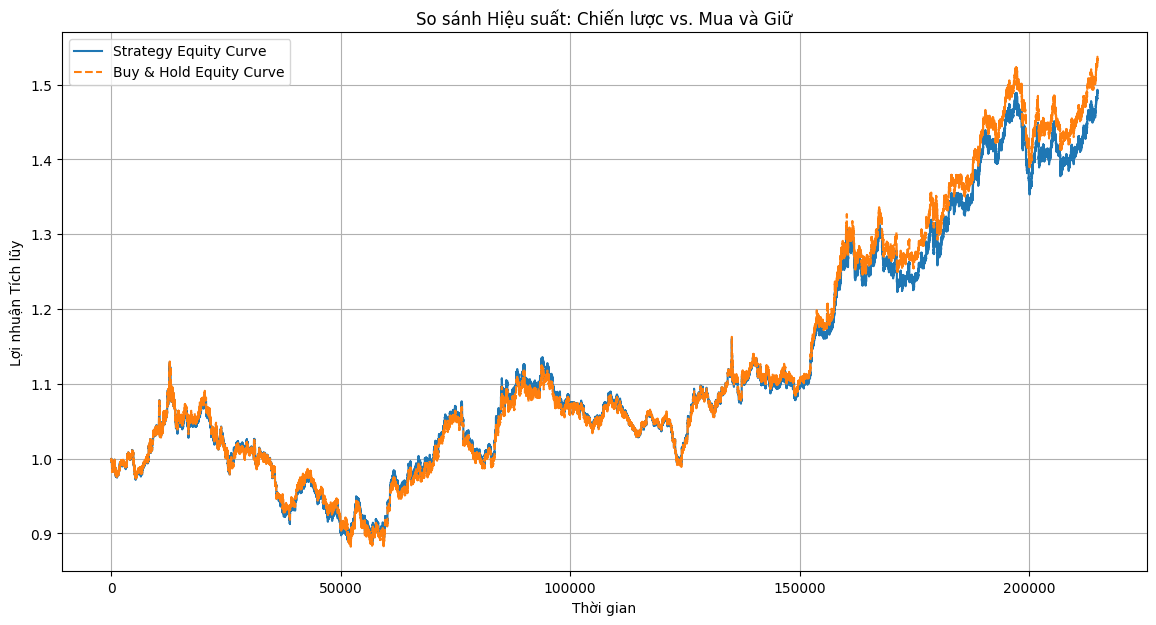

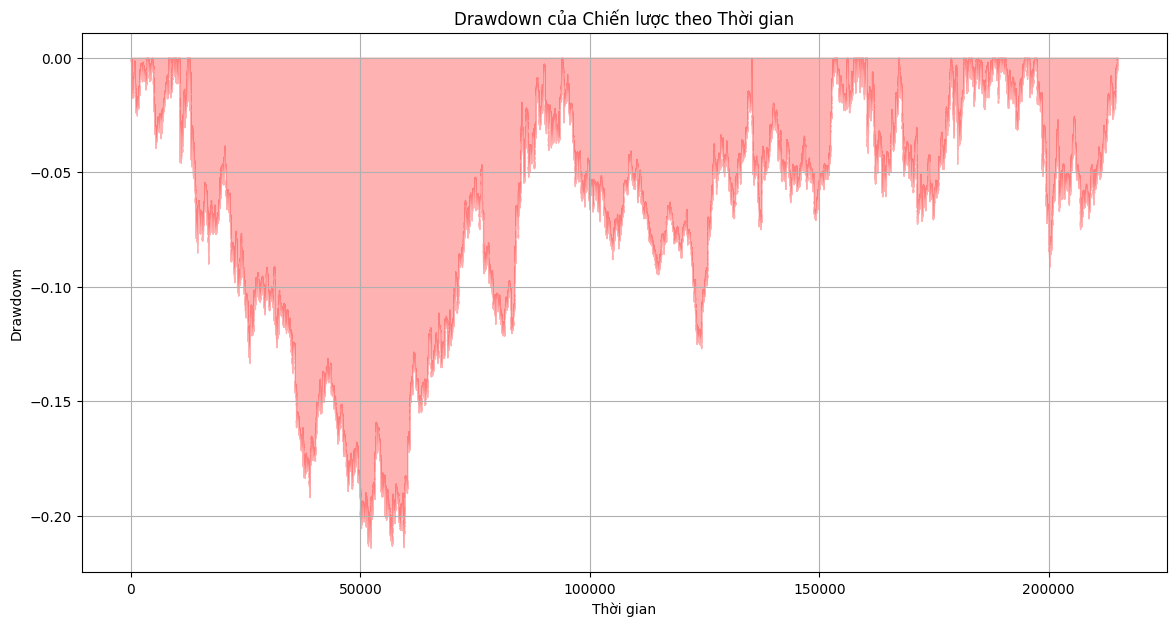

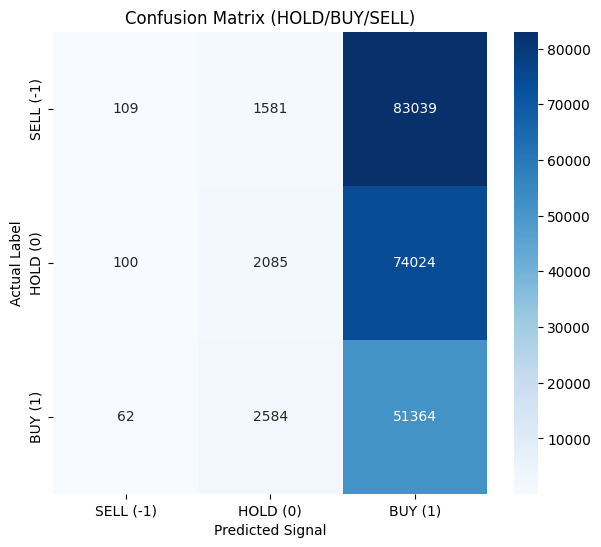


--- B√°o c√°o c√°c ch·ªâ s·ªë ph√¢n lo·∫°i (Precision, Recall, F1-score) ---
              precision    recall  f1-score   support

   SELL (-1)      0.402     0.001     0.003     84729
    HOLD (0)      0.334     0.027     0.051     76209
     BUY (1)      0.246     0.951     0.391     54010

    accuracy                          0.249    214948
   macro avg      0.327     0.327     0.148    214948
weighted avg      0.339     0.249     0.117    214948



In [77]:
predicted_signals = np.array([
    1 if p[1] > 0.1 # BUY
    else -1 if p[2] > 0.9 # SELL
    else 0
    for p in probabilities
])

result = evaluate_trading_strategy(predicted_signals, y_test[:-48], test_df[:-48])


Ph√¢n b·ªï t√≠n hi·ªáu (-1 = SELL, 0 = HOLD, 1 = BUY):
-1    0.394184
 0    0.354546
 1    0.251270
Name: proportion, dtype: float64

ƒêang ch·∫°y backtest...
Backtest ho√†n t·∫•t.

--- C√ÅC CH·ªà S·ªê HI·ªÜU SU·∫§T GIAO D·ªäCH ---
Cumulative Return         1972216548535.10%
Annualized Sharpe Ratio   3.37
Max Drawdown              -1.25%
Sortino Ratio             5.86
Calmar Ratio              1578390038374.28
Win Rate                  58.56%
Profit Factor             1.94
Payoff Ratio              1.35
Expectancy                0.00011
Avg Win                   0.00039
Avg Loss                  -0.00029
RR Ratio                  1.35
Number of Trades          213408


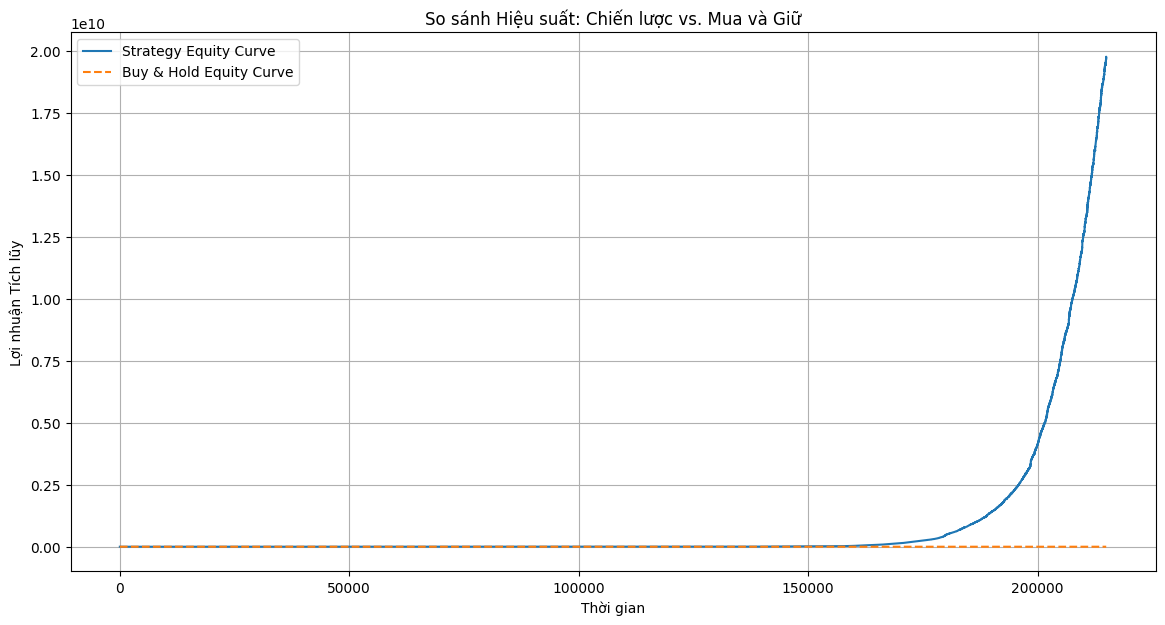

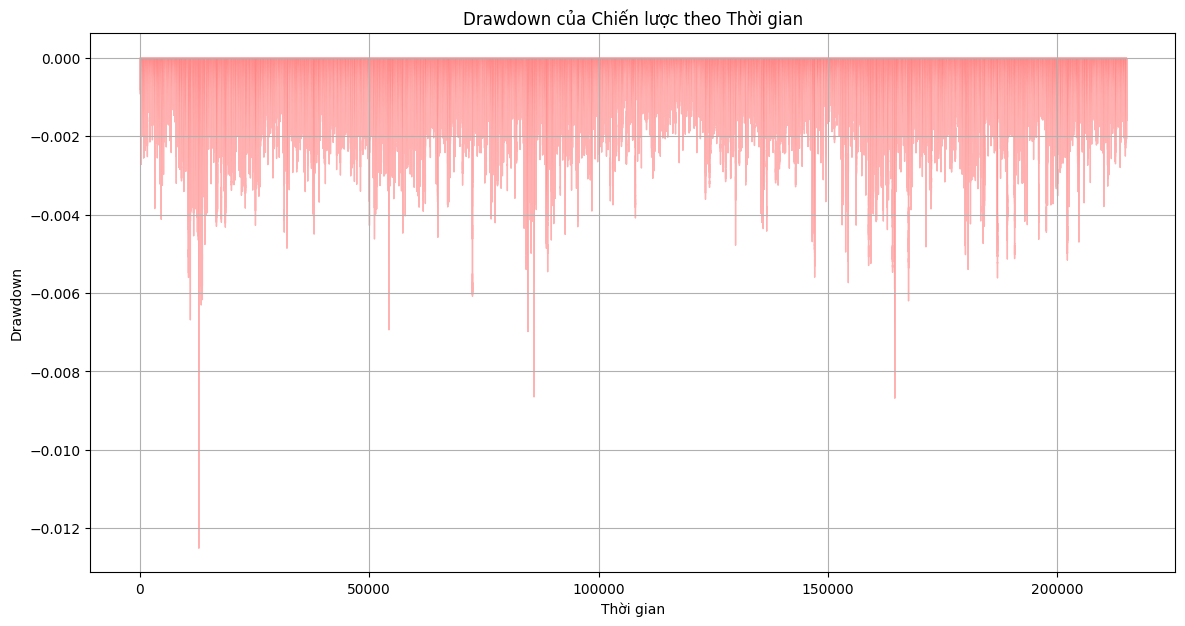

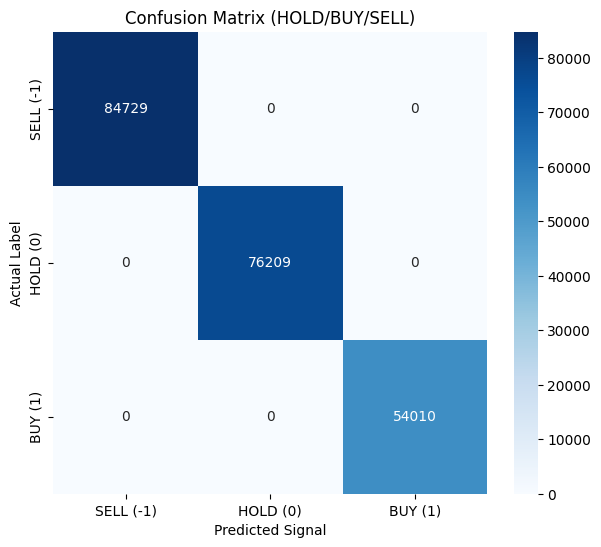


--- B√°o c√°o c√°c ch·ªâ s·ªë ph√¢n lo·∫°i (Precision, Recall, F1-score) ---
              precision    recall  f1-score   support

   SELL (-1)      1.000     1.000     1.000     84729
    HOLD (0)      1.000     1.000     1.000     76209
     BUY (1)      1.000     1.000     1.000     54010

    accuracy                          1.000    214948
   macro avg      1.000     1.000     1.000    214948
weighted avg      1.000     1.000     1.000    214948



{'signals': array([ 0,  0,  0, ..., -1, -1, -1], dtype=int32),
 'results_df':                        date     open     high      low    close  volume label  \
 0       2022-01-03 01:05:00  1830.63  1831.82  1829.52  1831.65     251  SELL   
 1       2022-01-03 01:10:00  1831.61  1831.61  1830.48  1830.51     162   BUY   
 2       2022-01-03 01:15:00  1830.48  1830.76  1829.98  1830.07     128  SELL   
 3       2022-01-03 01:20:00  1830.07  1830.08  1829.21  1829.32     112  SELL   
 4       2022-01-03 01:25:00  1829.35  1829.42  1828.99  1829.28     111  HOLD   
 ...                     ...      ...      ...      ...      ...     ...   ...   
 214943  2025-01-31 19:15:00  2805.86  2812.78  2803.46  2810.93     552   BUY   
 214944  2025-01-31 19:20:00  2811.08  2812.33  2808.36  2809.00     501   BUY   
 214945  2025-01-31 19:25:00  2809.20  2809.38  2806.31  2807.83     435  HOLD   
 214946  2025-01-31 19:30:00  2807.94  2809.91  2807.03  2808.74     477   BUY   
 214947  2025-01-31 1

In [76]:
true_signals = y_test[:-48].replace(2, -1).values.copy()
evaluate_trading_strategy(signals, y_test[:-48], test_df[:-48])